In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scipy
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from dsn.train_dsn import train_dsn
from dsn.util.systems import STGCircuit
from dsn.util.dsn_util import get_savedir
from dsn.util.plot_util import assess_constraints, plot_opt, dsn_pairplots, \
                               pairplot, lin_reg_plot
from tf_util.stat_util import approx_equal
import matplotlib.backends.backend_pdf

2
file /Users/sbittner/Documents/dsn/dsn/models/STGCircuit/STGCircuit_g_el_g_synA_hubfreq_mu=5.25E-01_2.76E-01_flow=K=4_10P_M_A_sigma=1.00_c=0_rs=1/opt_info.npz
T_xs (401, 200, 2)
al final
[None]


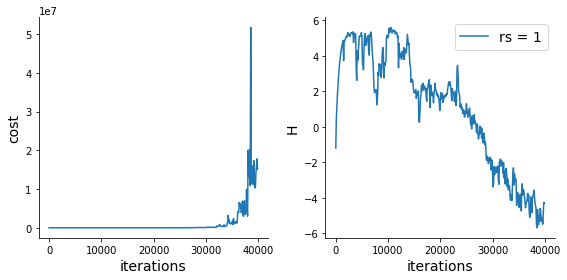

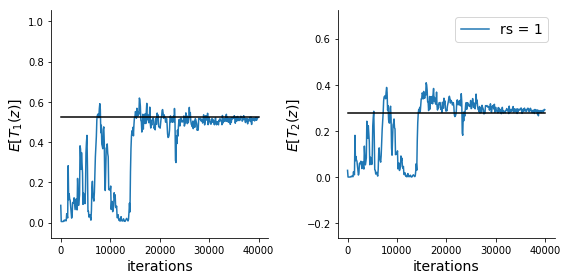

In [19]:
EPS = 1e-16

# multivariate normal initialization variance
sigma_init = 1.0
c_init_order = 0

dirstr = 'STGCircuit'

# create an instance of the V1_circuit system class
fixed_params = {'g_synB':5e-9};

behavior_type = "hubfreq"

fft_start = 0
w = 20
dt = 0.025

freq = "med"
if freq == "med":
    T = 200
    mean = 0.525
    variance = 0.025**2
elif freq == "high":
    T = 500
    mean = 0.725
    variance = 0.025**2
else:
    print('Error: freq not high or med.')
    
fixed_params = {'g_synB':5e-9}
behavior = {"type":"hubfreq",
            "mean":mean,
            "variance":variance}
model_opts = {"dt":dt,
              "T":T,
              "fft_start":fft_start,
              "w":w
             }

system = STGCircuit(fixed_params, behavior, model_opts)

print(system.num_suff_stats)

# normalizing flow layer architecture
# number of layers
flow_type = 'PlanarFlow'
nlayers = 10
K = 4
arch_dict = {'D':system.D, \
             'K':K, \
             'post_affine':True, \
             'flow_type':flow_type, \
             'repeats':nlayers}
lr_order = -3

start_rs = 1
num_rs = 1
random_seeds = np.arange(start_rs, num_rs+start_rs)

basedir = '/Users/sbittner/Documents/dsn/dsn/'
fnames = []
legendstrs = []
max_inds = []
for i in range(num_rs):
    random_seed = random_seeds[i]
    dsndir = basedir + get_savedir(system, arch_dict, sigma_init, lr_order, c_init_order, random_seed, dirstr)
    fname = dsndir + 'opt_info.npz'
    fnames.append(dsndir + 'opt_info.npz')
    legendstrs.append('rs = %d' % random_seed)
    npzfile = np.load(fname)
    print('file', fname)
    behavior_i = npzfile['behavior'][()]
    cs_i = npzfile['cs']
    k_max = len(cs_i)
    #assert(approx_equal(behavior_i['means'], behavior['means'], EPS))
    #assert(approx_equal(behavior_i['variances'], behavior['variances'], EPS))
    #max_inds.append(k_max-1)
    
alpha = 0.05
frac_samps = 0.8
k_max = len(cs_i)

figs, AL_final_its, p_values = plot_opt(fnames, legendstrs, con_method='1', \
                                        frac_samps=frac_samps, maxconlim=0.6)

[0, 0]


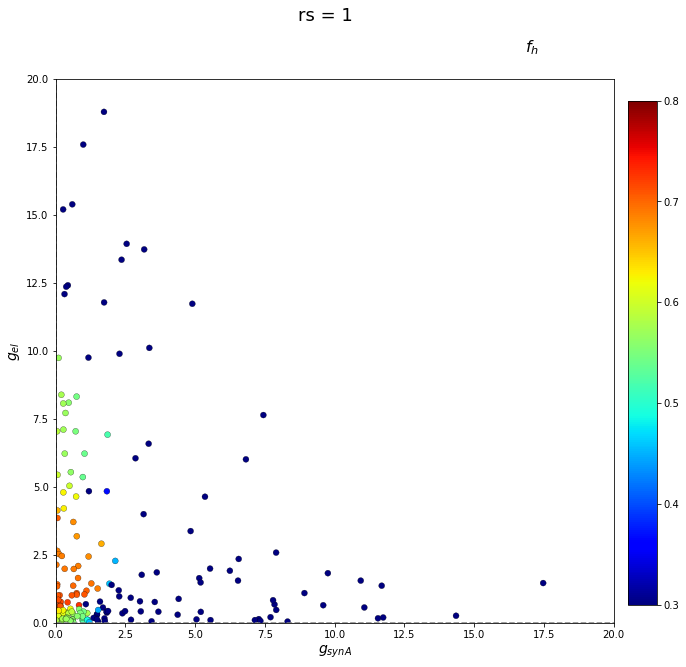

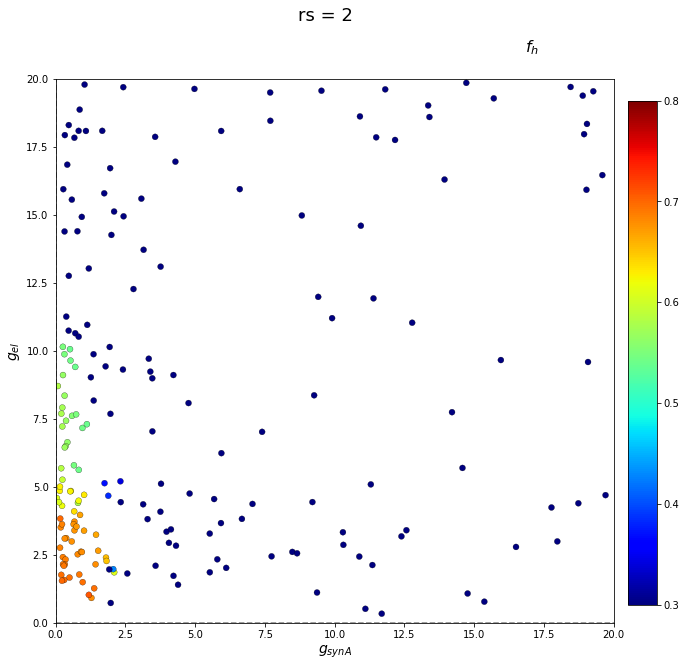

In [15]:
print(AL_final_its)
AL_final_its = [40, 40]
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
Zs = dsn_pairplots(fnames, 'Zs', system, system.D, f_str='identity', \
                   c_str='hubfreq', legendstrs=legendstrs, AL_final_its=AL_final_its, \
                   fontsize=14, ellipses=False, tri=True, \
                   outlier_stds=10,
                   xlims=[0, 20], ylims=[0, 20])


[0, 0]


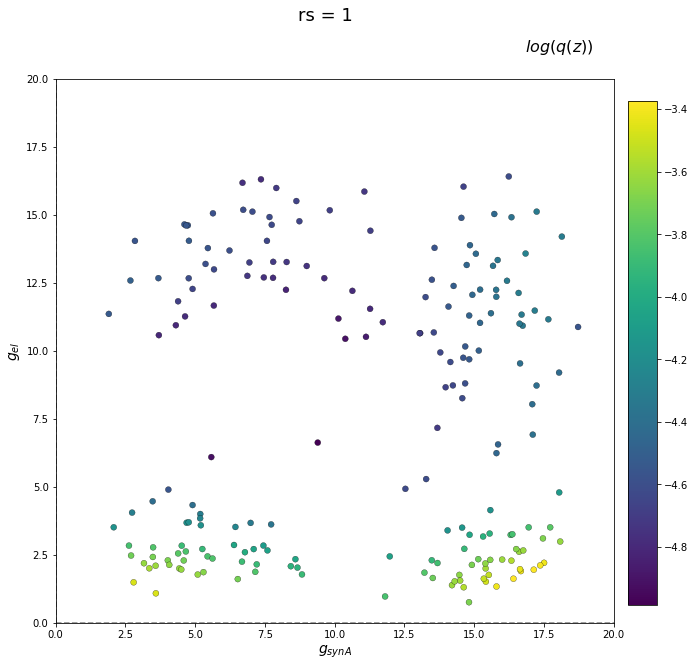

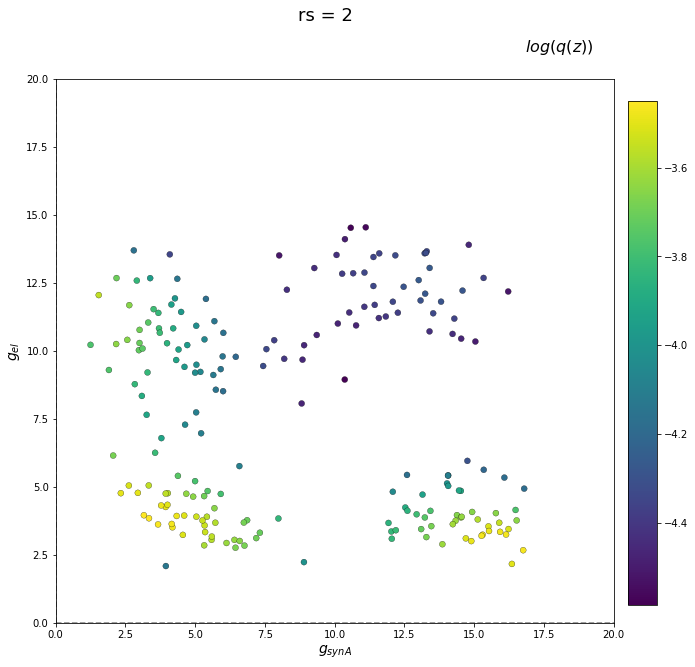

In [18]:
print(AL_final_its)
AL_final_its = [10, 10]
#pfnames = ['images/Z_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
Zs = dsn_pairplots(fnames, 'Zs', system, system.D, f_str='identity', \
                   c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
                   fontsize=14, ellipses=False, tri=True, \
                   outlier_stds=10,
                   xlims=[0, 20], ylims=[0, 20])


here!
not saving
k = 10 has not converged so not plotting.
here!
not saving
k = 10 has not converged so not plotting.


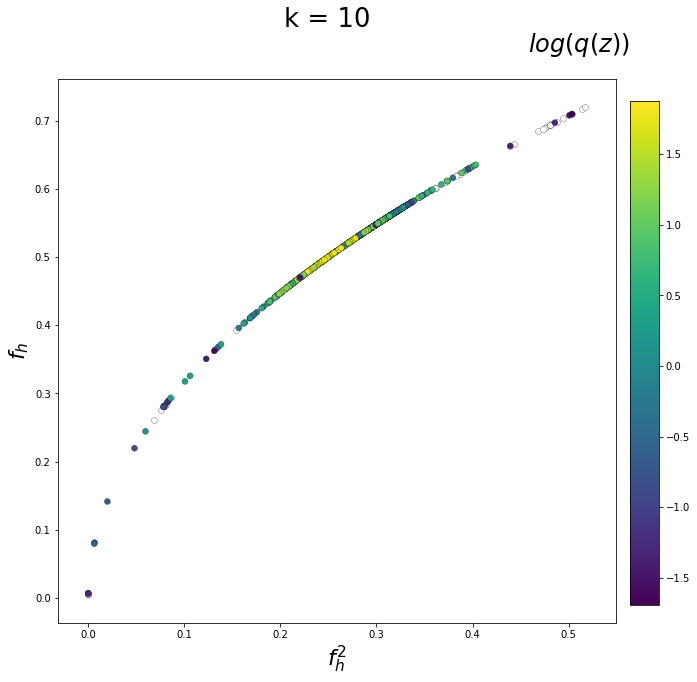

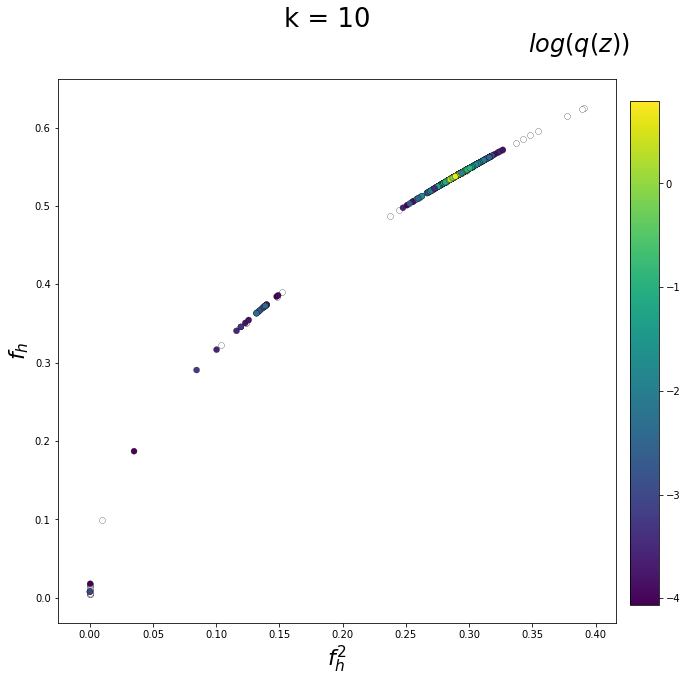

In [36]:
#pfnames = ['images/T_x_SC_pvar_%s_c=%d_p=%d_rs=%d.png' % (model_opts["params"], c_init_order, int(100*p), rs) \
#           for rs in range(start_rs, start_rs+num_rs)]
T_xs = dsn_pairplots(fnames, 'T_xs', system, 2, f_str='identity', \
                      c_str='log_q_z', legendstrs=legendstrs, AL_final_its=AL_final_its, \
                      fontsize=22, ellipses=False, tri=True) #, pfnames=pfnames)        

